In [1]:
from gameagent import Agent
import gym
import numpy as np
import matplotlib.pyplot as plt


Using TensorFlow backend.
C:\Users\ie-49\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ie-49\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ie-49\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users

In [2]:
env = gym.make("MountainCarContinuous-v0")
agent = Agent(2,1,train_batch_size = 640)

W0830 13:17:15.120162 12396 deprecation_wrapper.py:119] From C:\Users\ie-49\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0830 13:17:15.138114 12396 deprecation_wrapper.py:119] From C:\Users\ie-49\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0830 13:17:15.142104 12396 deprecation_wrapper.py:119] From C:\Users\ie-49\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0830 13:17:15.332595 12396 deprecation_wrapper.py:119] From C:\Users\ie-49\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 2)            0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          384         input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 256)          33024       dense_1[0][0]                    
____________________________________________________________________________________________

In [5]:
epsilon = 0.999
epsilon_decaying = 0.99995
def run_episode(train = True, render = False, train_batch_size = 640,verbose = False):
    global epsilon
    global epsilon_decaying
    epsilon *= epsilon_decaying
    record = []
    done = False
    frame = env.reset()
    ep_reward = 0
    while done != True:
        if render:
            env.render()
        state = frame.reshape(1,-1)
        state = (state - env.observation_space.low) / \
                (env.observation_space.high - env.observation_space.low)
        if np.random.random() < epsilon:
            action = np.clip(agent.get_action(state) + (np.random.normal()*epsilon),-1,1)
        else:
            action = agent.get_action(state)
        next_frame, reward, done, _ = env.step(action)
        if reward <100 :
            reward = -1.
        else :
            reward = 100.
        agent.memory.add(state,action,reward,next_frame.reshape(1,-1),done)
        ep_reward += reward
        frame = next_frame
        if verbose :
            print('state : ', state, ', action :', action, ', reward : ',reward,', reward : ', reward,', done : ',done,\
                ', ep_reward : ',ep_reward)
    if train:
        print('trained_start')
        agent.train()
        print('trained_well')
    print("ep_reward:", ep_reward)

    episode_reward_lst.append(ep_reward)


In [6]:
episode_reward_lst = []

In [19]:
'''
agent.main_critic.model.save_weights("./well_trained_main_critic_"+str(iterate+1)+".h5")
agent.target_critic.model.save_weights("./well_trained_target_critic_"+str(iterate+1)+".h5")
agent.main_actor.model.save_weights("./well_trained_main_actor_"+str(iterate+1)+".h5") 
agent.target_actor.model.save_weights("./well_trained_target_actor_"+str(iterate+1)+".h5")
'''

In [7]:
def run_training(iteration,save_point):
    for iterate in range(1,iteration+1):
        print('iterate : ',iterate)
        if iterate % 5 == 0:
            run_episode(train = True, render = False, train_batch_size=640,verbose=False)
        else:
            run_episode(train = False, render = False, train_batch_size=640,verbose=False)
        if iterate % save_point == 0:
            agent.main_critic.model.save_weights("./well_trained_main_critic_"+str(iterate+1)+".h5")
            agent.target_critic.model.save_weights("./well_trained_target_critic_"+str(iterate+1)+".h5")
            agent.main_actor.model.save_weights("./well_trained_main_actor_"+str(iterate+1)+".h5") 
            agent.target_actor.model.save_weights("./well_trained_target_actor_"+str(iterate+1)+".h5")

In [8]:
run_training(1000,1000)

iterate :  1
ep_reward: -999.0
iterate :  2
ep_reward: -999.0
iterate :  3
ep_reward: -999.0
iterate :  4
ep_reward: -999.0
iterate :  5
trained_start
trained_well
ep_reward: -999.0
iterate :  6
ep_reward: -999.0
iterate :  7
ep_reward: -999.0
iterate :  8
ep_reward: -999.0
iterate :  9
ep_reward: -999.0
iterate :  10
trained_start
trained_well
ep_reward: -999.0
iterate :  11
ep_reward: -999.0
iterate :  12
ep_reward: -999.0
iterate :  13
ep_reward: -999.0
iterate :  14
ep_reward: -999.0
iterate :  15
trained_start
trained_well
ep_reward: -999.0
iterate :  16
ep_reward: -999.0
iterate :  17
ep_reward: -999.0
iterate :  18
ep_reward: -999.0
iterate :  19
ep_reward: -999.0
iterate :  20
trained_start
trained_well
ep_reward: -999.0
iterate :  21
ep_reward: -999.0
iterate :  22
ep_reward: -999.0
iterate :  23
ep_reward: -999.0
iterate :  24
ep_reward: -999.0
iterate :  25
trained_start
trained_well
ep_reward: -743.0
iterate :  26
ep_reward: -999.0
iterate :  27
ep_reward: -999.0
iterate : 

ep_reward: -999.0
iterate :  218
ep_reward: -999.0
iterate :  219
ep_reward: -999.0
iterate :  220
trained_start
trained_well
ep_reward: -999.0
iterate :  221
ep_reward: -999.0
iterate :  222
ep_reward: -920.0
iterate :  223
ep_reward: -999.0
iterate :  224
ep_reward: -941.0
iterate :  225
trained_start
trained_well
ep_reward: -999.0
iterate :  226
ep_reward: -999.0
iterate :  227
ep_reward: -796.0
iterate :  228
ep_reward: -999.0
iterate :  229
ep_reward: -999.0
iterate :  230
trained_start
trained_well
ep_reward: -999.0
iterate :  231
ep_reward: -999.0
iterate :  232
ep_reward: -999.0
iterate :  233
ep_reward: -999.0
iterate :  234
ep_reward: -999.0
iterate :  235
trained_start
trained_well
ep_reward: -999.0
iterate :  236
ep_reward: -999.0
iterate :  237
ep_reward: -999.0
iterate :  238
ep_reward: -699.0
iterate :  239
ep_reward: -999.0
iterate :  240
trained_start
trained_well
ep_reward: -999.0
iterate :  241
ep_reward: -999.0
iterate :  242
ep_reward: -999.0
iterate :  243
ep_rewa

KeyboardInterrupt: 

In [21]:
def test(render = False,verbose = False):
    done = False
    frame = env.reset()
    ep_reward = 0
    while done != True:
        if render:
            env.render()
        state = frame.reshape(1,-1)
        state = (state - env.observation_space.low) / \
                (env.observation_space.high - env.observation_space.low)

        action = agent.get_action(state)
        next_frame, reward, done, _ = env.step(action)
        if reward <100 :
            reward = -1.
        else :
            reward = 100.
        ep_reward += reward
        frame = next_frame
        if verbose :
            print('state : ', state, ', action :', action, ', reward : ',reward,', reward : ', reward,', done : ',done,\
                ', ep_reward : ',ep_reward)


In [22]:
test(render = True,verbose = True)

state :  [[0.37792484 0.5       ]] , action : [[0.9995291]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -1.0
state :  [[0.3787417 0.5105023]] , action : [[0.9995507]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -2.0
state :  [[0.38036928 0.520926  ]] , action : [[0.999574]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -3.0
state :  [[0.38279542 0.5311931 ]] , action : [[0.99959874]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -4.0
state :  [[0.3860019 0.5412266]] , action : [[0.9996241]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -5.0
state :  [[0.38996482 0.55095154]] , action : [[0.99964964]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -6.0
state :  [[0.39465445 0.56029546]] , action : [[0.99967504]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -7.0
state :  [[0.40003583 0.56918925]] , action : [[0.9996999]] , reward :  -1.0 , reward :  -1.

state :  [[0.50621635 0.3774851 ]] , action : [[0.9997542]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -67.0
state :  [[0.49662113 0.3766334 ]] , action : [[0.99973136]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -68.0
state :  [[0.48701572 0.37650168]] , action : [[0.99970716]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -69.0
state :  [[0.4774584  0.37711987]] , action : [[0.9996818]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -70.0
state :  [[0.46800926 0.37851122]] , action : [[0.99965537]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -71.0
state :  [[0.4587297  0.38069126]] , action : [[0.9996282]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -72.0
state :  [[0.4496816 0.3836675]] , action : [[0.9996015]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -73.0
state :  [[0.44092688 0.3874388 ]] , action : [[0.9995759]] , reward :  -1.0 , rew

state :  [[0.63101697 0.47190747]] , action : [[0.9999413]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -135.0
state :  [[0.6283021  0.46509388]] , action : [[0.9999383]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -136.0
state :  [[0.6250612 0.4583322]] , action : [[0.9999351]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -137.0
state :  [[0.62129974 0.45163742]] , action : [[0.9999314]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -138.0
state :  [[0.617024   0.44502702]] , action : [[0.9999272]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -139.0
state :  [[0.61224234 0.43852118]] , action : [[0.9999223]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -140.0
state :  [[0.6069645  0.43214312]] , action : [[0.9999168]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -141.0
state :  [[0.6012027  0.42591935]] , action : [[0.9999106]] , reward :  -1.0 ,

state :  [[0.55360204 0.61216813]] , action : [[0.99992996]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -199.0
state :  [[0.56202155 0.60825074]] , action : [[0.9999338]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -200.0
state :  [[0.5701014  0.60388315]] , action : [[0.999937]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -201.0
state :  [[0.5778101  0.59911287]] , action : [[0.9999399]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -202.0
state :  [[0.58512014 0.59398586]] , action : [[0.99994236]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -203.0
state :  [[0.5920071 0.5885459]] , action : [[0.99994445]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -204.0
state :  [[0.5984497  0.58283424]] , action : [[0.99994636]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -205.0
state :  [[0.60442996 0.57688874]] , action : [[0.99994785]] , reward :  -1

state :  [[0.37882695 0.5120824 ]] , action : [[0.9995537]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -262.0
state :  [[0.38057676 0.522498  ]] , action : [[0.99957746]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -263.0
state :  [[0.3831236  0.53274506]] , action : [[0.99960226]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -264.0
state :  [[0.38644838 0.542747  ]] , action : [[0.9996276]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -265.0
state :  [[0.3905262  0.55242896]] , action : [[0.99965334]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -266.0
state :  [[0.39532655 0.56171894]] , action : [[0.9996786]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -267.0
state :  [[0.40081367 0.5705483 ]] , action : [[0.9997033]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -268.0
state :  [[0.40694666 0.57885265]] , action : [[0.99972695]] , reward :  

state :  [[0.47615117 0.3771452 ]] , action : [[0.99967813]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -330.0
state :  [[0.46671236 0.37864423]] , action : [[0.9996514]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -331.0
state :  [[0.45745173 0.3809343 ]] , action : [[0.99962413]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -332.0
state :  [[0.44843116 0.38402176]] , action : [[0.99959767]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -333.0
state :  [[0.4397126  0.38790432]] , action : [[0.9995721]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -334.0
state :  [[0.431357   0.39257067]] , action : [[0.9995484]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -335.0
state :  [[0.42342377 0.39800087]] , action : [[0.9995262]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -336.0
state :  [[0.41597    0.40416622]] , action : [[0.99950683]] , reward :  

state :  [[0.6165893 0.444153 ]] , action : [[0.9999266]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -399.0
state :  [[0.61174047 0.4376583 ]] , action : [[0.9999218]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -400.0
state :  [[0.6063967  0.43129435]] , action : [[0.9999162]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -401.0
state :  [[0.6005702  0.42508802]] , action : [[0.99991]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -402.0
state :  [[0.59427565 0.4190696 ]] , action : [[0.9999026]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -403.0
state :  [[0.5875302 0.4132728]] , action : [[0.9998946]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -404.0
state :  [[0.580354   0.40773466]] , action : [[0.99988556]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -405.0
state :  [[0.5727703  0.40249535]] , action : [[0.9998753]] , reward :  -1.0 , re

state :  [[0.6106932 0.5700538]] , action : [[0.9999495]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -467.0
state :  [[0.6156492 0.56372  ]] , action : [[0.9999505]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -468.0
state :  [[0.6201019  0.55724996]] , action : [[0.9999513]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -469.0
state :  [[0.6240428 0.5506681]] , action : [[0.99995184]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -470.0
state :  [[0.6274647 0.5439957]] , action : [[0.9999524]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -471.0
state :  [[0.63036203 0.53725094]] , action : [[0.99995255]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -472.0
state :  [[0.6327303 0.5304496]] , action : [[0.9999523]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -473.0
state :  [[0.63456625 0.5236052 ]] , action : [[0.99995214]] , reward :  -1.0 , rewa

state :  [[0.43784365 0.6064058 ]] , action : [[0.9998104]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -533.0
state :  [[0.44649598 0.6112446 ]] , action : [[0.99982697]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -534.0
state :  [[0.45546398 0.6153024 ]] , action : [[0.9998421]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -535.0
state :  [[0.46468577 0.6185659 ]] , action : [[0.99985564]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -536.0
state :  [[0.4740993  0.62103105]] , action : [[0.99986786]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -537.0
state :  [[0.4836428 0.6227022]] , action : [[0.9998787]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -538.0
state :  [[0.4932555 0.6235922]] , action : [[0.9998885]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -539.0
state :  [[0.50287837 0.62372184]] , action : [[0.99989724]] , reward :  -1.0

state :  [[0.41521212 0.40470013]] , action : [[0.99950457]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -597.0
state :  [[0.40833932 0.41163525]] , action : [[0.99948883]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -598.0
state :  [[0.40205646 0.41922045]] , action : [[0.9994765]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -599.0
state :  [[0.39641008 0.42740366]] , action : [[0.99946773]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -600.0
state :  [[0.39144215 0.43612686]] , action : [[0.99946314]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -601.0
state :  [[0.3871898  0.44532678]] , action : [[0.99946284]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -602.0
state :  [[0.38368478 0.45493564]] , action : [[0.9994668]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -603.0
state :  [[0.3809534  0.46488208]] , action : [[0.99947476]] , reward :

state :  [[0.60017735 0.424506  ]] , action : [[0.99990934]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -662.0
state :  [[0.5938385  0.41850087]] , action : [[0.99990207]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -663.0
state :  [[0.5870501  0.41272017]] , action : [[0.999894]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -664.0
state :  [[0.57983243 0.40720126]] , action : [[0.99988467]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -665.0
state :  [[0.572209  0.4019846]] , action : [[0.9998746]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -666.0
state :  [[0.5642068  0.39711344]] , action : [[0.99986297]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -667.0
state :  [[0.555856   0.39263335]] , action : [[0.9998501]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -668.0
state :  [[0.5471909  0.38859156]] , action : [[0.9998357]] , reward :  -1.

state :  [[0.6205759  0.55678195]] , action : [[0.99995136]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -729.0
state :  [[0.6244795 0.5501888]] , action : [[0.999952]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -730.0
state :  [[0.6278634  0.54350674]] , action : [[0.99995226]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -731.0
state :  [[0.63072205 0.53675395]] , action : [[0.9999527]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -732.0
state :  [[0.63305116 0.52994597]] , action : [[0.9999523]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -733.0
state :  [[0.6348475 0.523096 ]] , action : [[0.99995214]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -734.0
state :  [[0.6361087 0.5162156]] , action : [[0.99995154]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -735.0
state :  [[0.6368332 0.5093148]] , action : [[0.9999507]] , reward :  -1.0 , re

state :  [[0.4653051 0.6188766]] , action : [[0.9998566]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -796.0
state :  [[0.47473866 0.6212887 ]] , action : [[0.9998687]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -797.0
state :  [[0.48429805 0.6229068 ]] , action : [[0.99987954]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -798.0
state :  [[0.49392262 0.6237441 ]] , action : [[0.99988925]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -799.0
state :  [[0.5035532 0.623822 ]] , action : [[0.9998979]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -800.0
state :  [[0.513133  0.6231687]] , action : [[0.9999055]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -801.0
state :  [[0.5226078 0.6218185]] , action : [[0.9999124]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -802.0
state :  [[0.5319264 0.6198108]] , action : [[0.99991834]] , reward :  -1.0 , rewa

state :  [[0.37802747 0.5071171 ]] , action : [[0.9995422]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -868.0
state :  [[0.37939712 0.51760966]] , action : [[0.99956506]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -869.0
state :  [[0.3815726 0.5279703]] , action : [[0.9995897]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -870.0
state :  [[0.3845376 0.5381216]] , action : [[0.9996149]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -871.0
state :  [[0.38826993 0.54798746]] , action : [[0.9996406]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -872.0
state :  [[0.3927417 0.5574943]] , action : [[0.9996663]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -873.0
state :  [[0.3979195  0.56657153]] , action : [[0.99969137]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -874.0
state :  [[0.4037647 0.5751526]] , action : [[0.9997156]] , reward :  -1.0 , rew

state :  [[0.5287257  0.38179058]] , action : [[0.9998019]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -931.0
state :  [[0.51934373 0.37937474]] , action : [[0.99978274]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -932.0
state :  [[0.5098228  0.37758854]] , action : [[0.999762]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -933.0
state :  [[0.5002153  0.37647408]] , action : [[0.99973977]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -934.0
state :  [[0.4905762  0.37606916]] , action : [[0.99971586]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -935.0
state :  [[0.48096335 0.3764061 ]] , action : [[0.99969083]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -936.0
state :  [[0.47143644 0.3775109 ]] , action : [[0.9996646]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -937.0
state :  [[0.46205658 0.37940222]] , action : [[0.9996375]] , reward :  -

state :  [[0.63506514 0.5228661 ]] , action : [[0.99995226]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -994.0
state :  [[0.6363082  0.51598203]] , action : [[0.99995166]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -995.0
state :  [[0.63701427 0.509078  ]] , action : [[0.99995077]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -996.0
state :  [[0.6371825 0.5021631]] , action : [[0.9999499]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -997.0
state :  [[0.6368127  0.49524558]] , action : [[0.9999485]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -998.0
state :  [[0.6359054  0.48833373]] , action : [[0.99994683]] , reward :  -1.0 , reward :  -1.0 , done :  True , ep_reward :  -999.0


NameError: name 'agent' is not defined

In [23]:
env.close()

In [24]:
import matplotlib.pyplot as plt

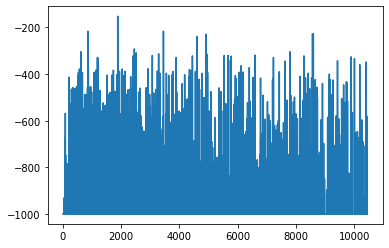

In [29]:
%matplotlib inline
plt.plot(episode_reward_lst)
plt.show()